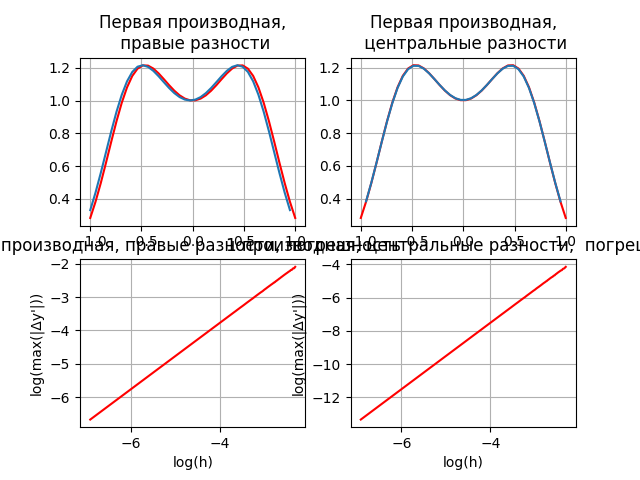

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

n = 40
a = -1
b = 1
h = (b - a) / (n - 1)


def f(x):
    return 1 + (np.tanh(x + x ** 3))


def d1_f(x):
    return (1 + 3 * x ** 2) / (np.cosh(x + x ** 3)) ** 2


def right_dif(h, n):
    right_f = []
    x = np.arange(a, b + h, h)
    for i in range(0, n - 1):
        right_f.append((f(x[i + 1]) - f(x[i])) / h)
    return right_f


def center_dif(h, n):
    center_f = []
    x = np.arange(a, b + h, h)
    for i in range(1, n - 1):
        center_f.append((f(x[i + 1]) - f(x[i - 1])) / (2 * h))
    return center_f


x_nodes = np.arange(a, b + h, h)
y_nodes = d1_f(x_nodes)

plt.subplot(2, 2, 1)
plt.grid()
plt.title("Первая производная,\n правые разности")
plt.plot(x_nodes, y_nodes, color='red')
plt.plot(x_nodes[0:n - 1], right_dif(h, n))



plt.subplot(2, 2 , 2)
plt.grid(True)
plt.title("Первая производная,\n центральные разности")
plt.plot(x_nodes, y_nodes, color='red')
plt.plot(x_nodes[1:n - 1], center_dif(h, n))


hmin = 0.001
hstep = 0.001
hmax = 0.1
h_range = np.arange(hmin, hmax, hstep)
h_i_array = []
dfr_array1 = []
dfr_array2 = []


def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return max(dfr)


for h_i in h_range:
    h_i_array.append(math.log(h_i))
    x_nodes = np.arange(a, b + h_i, h_i)
    y_nodes = [d1_f(element) for element in x_nodes]
    y_r = right_dif(h_i, len(x_nodes))
    y_c = center_dif(h_i, len(x_nodes))
    dfr_array1.append(math.log(difference(y_nodes[0:len(y_nodes) - 1], y_r)))
    y_r.clear()
    dfr_array2.append(math.log(difference(y_nodes[1:len(y_nodes) - 1], y_c)))
    y_c.clear()


g3 = plt.subplot(2,2,3)
g3.set_xlabel('log(h)')
g3.set_ylabel("log(max(|Δy'|))")
plt.grid()
plt.title("1 производная, правые разности, погрешность")
plt.plot(h_i_array, dfr_array1, color='red')


g4 = plt.subplot(2,2,4)
g4.set_xlabel('log(h)')
g4.set_ylabel("log(max(|Δy'|))")
plt.grid()
plt.title("1 производная, центральные разности,  погрешность")
plt.plot(h_i_array, dfr_array2, color='red')

plt.show()



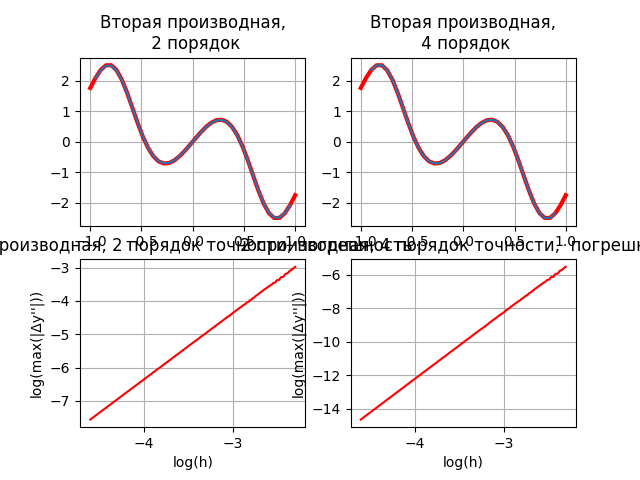

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

n = 40
a = -1
b = 1
h = (b - a) / (n - 1)


def f(x):
    return 1 + (np.tanh(x + x ** 3))


def d1_f(x):
    return (1 + 3 * x ** 2) / (np.cosh(x + x ** 3)) ** 2


def d2_f(x):
    return (6 * x * np.cosh(x + x ** 3) - 2 * np.sinh(x + x ** 3) - 12 * np.sinh(x + x ** 3) * x ** 2 - 18 * np.sinh(
        x + x ** 3) * x ** 4) / ((np.cosh(x + x ** 3)) ** 3)


def f2_dif2(h, n):
    dif2 = []
    x = np.arange(a, b + h, h)
    y = f(x)
    for i in range(1, n - 1):
        dif2.append((y[i - 1] - 2 * y[i] + y[i + 1]) / (h ** 2))
    return dif2


def f2_dif4(h, n):
    dif2 = []
    x = np.arange(a, b + h, h)
    y = f(x)
    for i in range(2, n - 2):
        dif2.append((-y[i - 2] + 16 * y[i - 1] - 30 * y[i] + 16 * y[i + 1] - y[i + 2]) / (12 * (h ** 2)))
    return dif2


x_nodes = np.arange(a, b + h, h)
y_nodes = d2_f(x_nodes)

plt.subplot(2,2,1)
plt.title("Вторая производная,\n 2 порядок")
plt.grid()
plt.plot(x_nodes, y_nodes, color='red', linewidth=3)
plt.plot(x_nodes[1:n - 1], f2_dif2(h, n))

plt.subplot(2,2,2)
plt.title("Вторая производная,\n 4 порядок")
plt.grid()
plt.plot(x_nodes, y_nodes, color='red', linewidth=3)
plt.plot(x_nodes[2:n - 2], f2_dif4(h, n))

hmin = 0.01
hstep = 0.001
hmax = 0.1
h_range = np.arange(hmin, hmax, hstep)
h_i_array = []
dfr_array1 = []
dfr_array2 = []


def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return max(dfr)


for h_i in h_range:
    h_i_array.append(math.log(h_i))
    x_nodes = np.arange(a, b + h_i, h_i)
    y_nodes = [d2_f(element) for element in x_nodes]
    y2 = f2_dif2(h_i, len(x_nodes))
    y4 = f2_dif4(h_i, len(x_nodes))
    dfr_array1.append(math.log(difference(y_nodes[1:len(y_nodes) - 1], y2)))
    y2.clear()
    dfr_array2.append(math.log(difference(y_nodes[2:len(y_nodes) - 2], y4)))
    y4.clear()


g3 = plt.subplot(2,2,3)
g3.set_xlabel('log(h)')
g3.set_ylabel("log(max(|Δy''|))")
plt.grid(True)
plt.title("2 производная, 2 порядок точности, погрешность")
plt.plot(h_i_array, dfr_array1, color='red')

g4 = plt.subplot(2,2,4)
g4.set_xlabel('log(h)')
g4.set_ylabel("log(max(|Δy''|))")
plt.grid(True)
plt.title("2 производная, 4 порядок точности,  погрешность")
plt.plot(h_i_array, dfr_array2, color='red')

plt.show()
